In [1]:
!pip install opencv-python

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Image Loading.

In [4]:
import cv2
import numpy as np

# Load image (modify path as needed)
image = cv2.imread('M_U.jpg')

# Check if the image is loaded
if image is None:
    raise ValueError("Image not found. Please check the path.")

# Table of Contents

1. [Sobel Filter and Edge Detection](#sobel-filter-and-edge-detection)
2. [Gaussian Blur on Grayscale Image](#gaussian-blur-on-grayscale-image)
3. [Gabor Filter Application and Visualization for Texture Detection at Different Angles](#gabor-filter-application-and-visualization-for-texture-detection-at-different-angles)
4. [Laplacian Edge Detection and Visualization on Grayscale Image](#laplacian-edge-detection-and-visualization-on-grayscale-image)
5. [Fourier Transform and Magnitude Spectrum of Image](#fourier-transform-and-magnitude-spectrum-of-image)
6. [Non-Maximum Suppression After Edge Detection](#non-maximum-suppression-after-edge-detection)
7. [Morphological Operations on an Image](#morphological-operations-on-an-image)
8. [Bilateral Filtering and Red Channel Extraction](#bilateral-filtering-and-red-channel-extraction)
9. [Brightness Adjustment](#brightness-adjustment)
10. [Canny Edge Detection](#canny-edge-detection)
11. [Emboss Filter](#emboss-filter)
12. [Median Blur](#median-blur)
13. [Motion Blur](#motion-blur)
14. [Sharpen Filter](#sharpen-filter)
15. [Add Gaussian Noise](#add-gaussian-noise)
16. [Grayscale Conversion](#grayscale-conversion)
17. [Box Filter (Averaging Filter)](#box-filter-averaging-filter)
18. [Unsharp Masking](#unsharp-masking)
19. [Prewitt Filter](#prewitt-filter)
20. [Cartoon Effect](#cartoon-effect)
21. [Pencil Sketch Effect](#pencil-sketch-effect)
22. [Histogram Equalization](#histogram-equalization)
23. [CLAHE (Contrast Limited Adaptive Histogram Equalization)](#clahe-contrast-limited-adaptive-histogram-equalization)
24. [Adaptive Thresholding](#adaptive-thresholding)
25. [Frequency Domain Filtering (High-Pass and Low-Pass Filters)](#frequency-domain-filtering-high-pass-and-low-pass-filters)
26. [Bilateral Grid Filtering](#bilateral-grid-filtering)
27. [Edge-Preserving Filter (e.g., cv2.edgePreservingFilter)](#edge-preserving-filter-eg-cv2edgepreservingfilter)
28. [Scharr Filter](#scharr-filter)

# 1. Sobel Filter and Edge Detection: Apply Sobel filters to detect edges in the image.

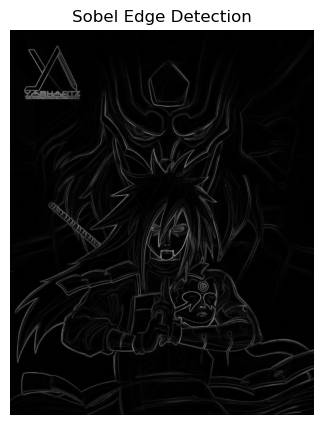

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale mode
image = cv2.imread('M_U.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Sobel filters
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Compute gradient magnitude
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Display the results
plt.figure(figsize=(10, 5))
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')
plt.show()

# 2. Gaussian Blur on Grayscale Image: Apply Gaussian Blur to smooth the image and reduce noise.

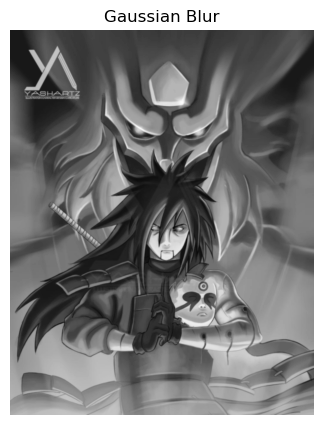

In [9]:
import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale mode
image = cv2.imread('M_U.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)

# Display the results
plt.figure(figsize=(10, 5))
plt.imshow(gaussian_blur, cmap='gray')
plt.title('Gaussian Blur')
plt.axis('off')
plt.show()

# 3. Gabor Filter Application and Visualization for Texture Detection at Different Angles: Use Gabor filters to detect textures at different angles and visualize the results.

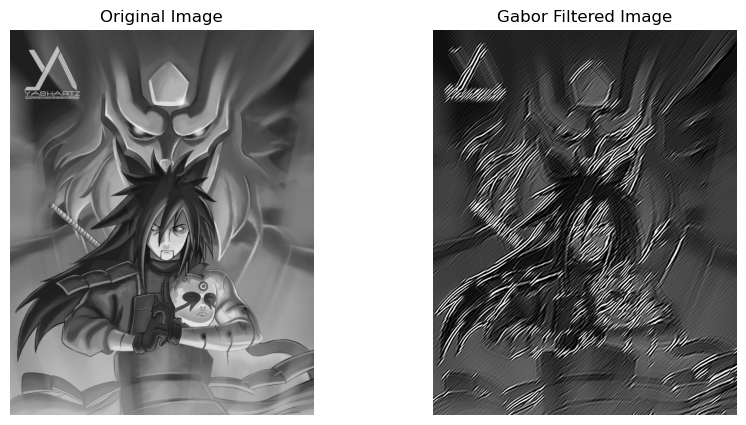

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale mode
image = cv2.imread('M_U.jpg', cv2.IMREAD_GRAYSCALE)

# Define Gabor filter parameters
ksize = 31
sigma = 4.0
theta = np.pi / 4
lamda = np.pi / 4
gamma = 0.5
psi = 0

# Apply Gabor filter
gabor_filter = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, psi, ktype=cv2.CV_32F)
filtered_image = cv2.filter2D(image, cv2.CV_8UC3, gabor_filter)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Gabor Filtered Image')
plt.axis('off')
plt.show()

# 4. Laplacian Edge Detection and Visualization on Grayscale Image: Apply the Laplacian filter to detect edges and visualize the results.

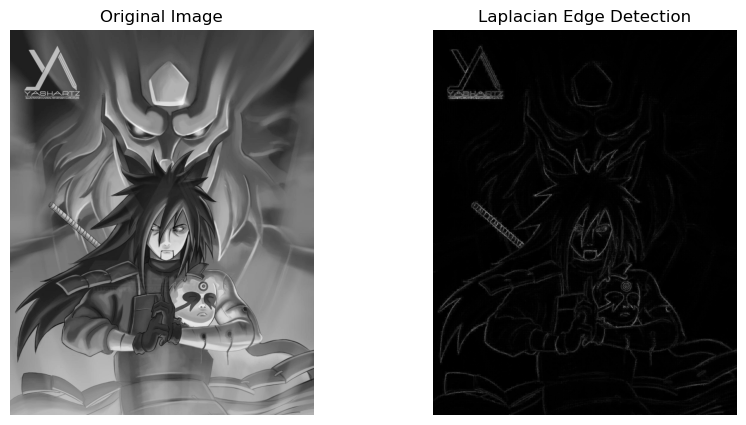

In [13]:
import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale mode
image = cv2.imread('M_U.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Laplacian filter
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Convert to uint8
laplacian = cv2.convertScaleAbs(laplacian)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')
plt.show()

# 5. Fourier Transform and Magnitude Spectrum of Image: Compute the Fourier Transform of the image and visualize the magnitude spectrum.

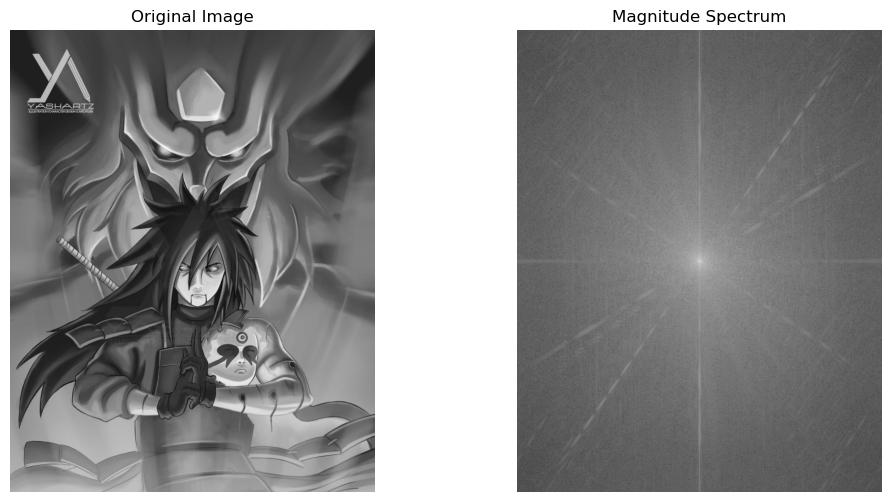

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale mode
image = cv2.imread('M_U.jpg', cv2.IMREAD_GRAYSCALE)

# Compute the 2D Fourier Transform of the image
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Compute the magnitude spectrum
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# Display the original image and its magnitude spectrum
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')
plt.show()

# 6. Non-Maximum Suppression After Edge Detection: Apply non-maximum suppression to refine edge detection results.

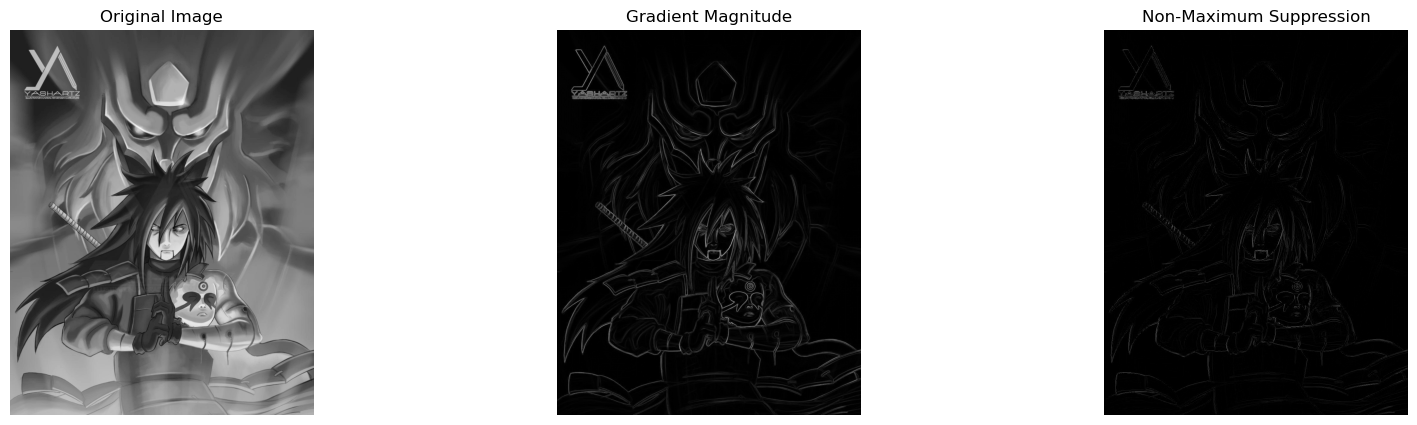

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def non_max_suppression(gradient_magnitude, angle):
    nms = np.zeros_like(gradient_magnitude)
    for i in range(1, gradient_magnitude.shape[0] - 1):
        for j in range(1, gradient_magnitude.shape[1] - 1):
            q = 255
            r = 255
            # Angle 0
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                q = gradient_magnitude[i, j + 1]
                r = gradient_magnitude[i, j - 1]
            # Angle 45
            elif 22.5 <= angle[i, j] < 67.5:
                q = gradient_magnitude[i + 1, j - 1]
                r = gradient_magnitude[i - 1, j + 1]
            # Angle 90
            elif 67.5 <= angle[i, j] < 112.5:
                q = gradient_magnitude[i + 1, j]
                r = gradient_magnitude[i - 1, j]
            # Angle 135
            elif 112.5 <= angle[i, j] < 157.5:
                q = gradient_magnitude[i - 1, j - 1]
                r = gradient_magnitude[i + 1, j + 1]

            if gradient_magnitude[i, j] >= q and gradient_magnitude[i, j] >= r:
                nms[i, j] = gradient_magnitude[i, j]
            else:
                nms[i, j] = 0

    return nms

# Load the image in grayscale mode
image = cv2.imread('M_U.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Sobel filters
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Compute gradient magnitude and angle
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
angle = np.arctan2(sobel_y, sobel_x) * 180 / np.pi
angle[angle < 0] += 180

# Apply Non-Maximum Suppression
nms_result = non_max_suppression(gradient_magnitude, angle)

# Display the results
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(nms_result, cmap='gray')
plt.title('Non-Maximum Suppression')
plt.axis('off')
plt.show()

# 7. Morphological Operations on an Image: Perform morphological operations like erosion, dilation, opening, and closing.

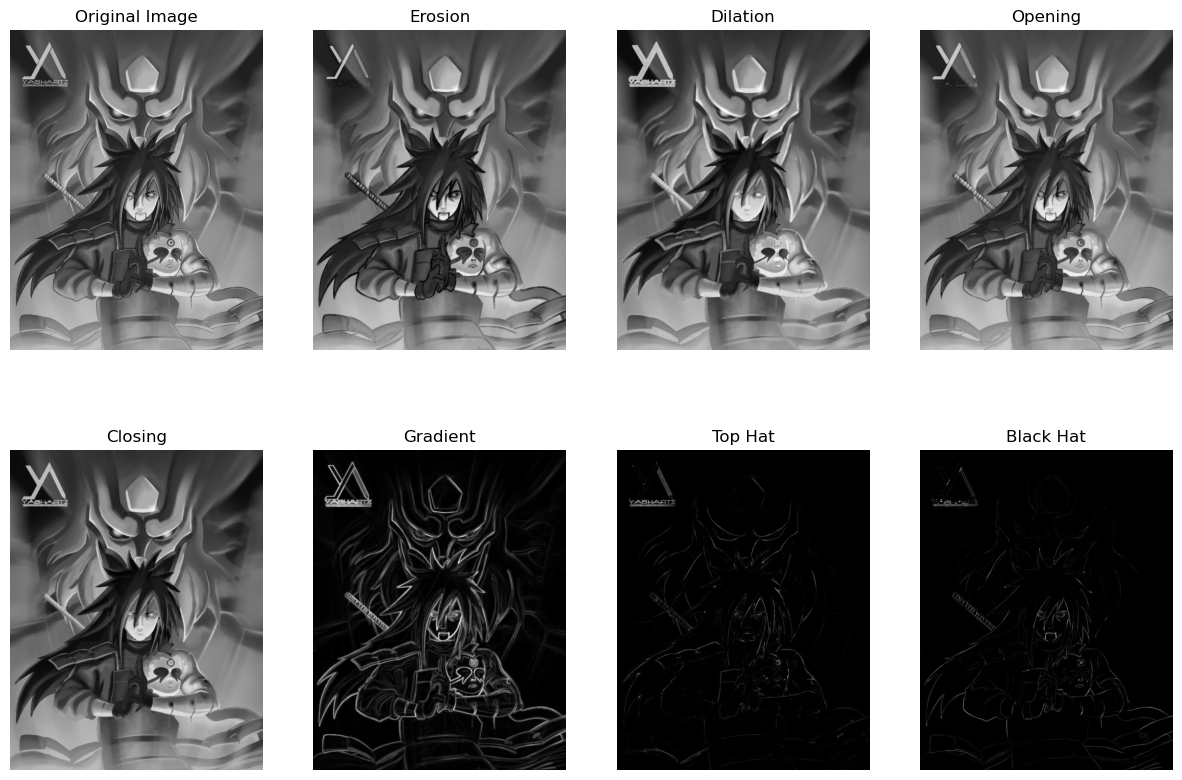

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale mode
image = cv2.imread('M_U.jpg', cv2.IMREAD_GRAYSCALE)

# Define a kernel
kernel = np.ones((5, 5), np.uint8)

# Apply morphological operations
erosion = cv2.erode(image, kernel, iterations=1)
dilation = cv2.dilate(image, kernel, iterations=1)
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel)

# Display the results
plt.figure(figsize=(15, 10))
plt.subplot(2, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(2, 4, 2)
plt.imshow(erosion, cmap='gray')
plt.title('Erosion')
plt.axis('off')
plt.subplot(2, 4, 3)
plt.imshow(dilation, cmap='gray')
plt.title('Dilation')
plt.axis('off')
plt.subplot(2, 4, 4)
plt.imshow(opening, cmap='gray')
plt.title('Opening')
plt.axis('off')
plt.subplot(2, 4, 5)
plt.imshow(closing, cmap='gray')
plt.title('Closing')
plt.axis('off')
plt.subplot(2, 4, 6)
plt.imshow(gradient, cmap='gray')
plt.title('Gradient')
plt.axis('off')
plt.subplot(2, 4, 7)
plt.imshow(tophat, cmap='gray')
plt.title('Top Hat')
plt.axis('off')
plt.subplot(2, 4, 8)
plt.imshow(blackhat, cmap='gray')
plt.title('Black Hat')
plt.axis('off')
plt.show()

# 8. Bilateral Filtering and Red Channel Extraction: Apply bilateral filtering and extract the red channel.

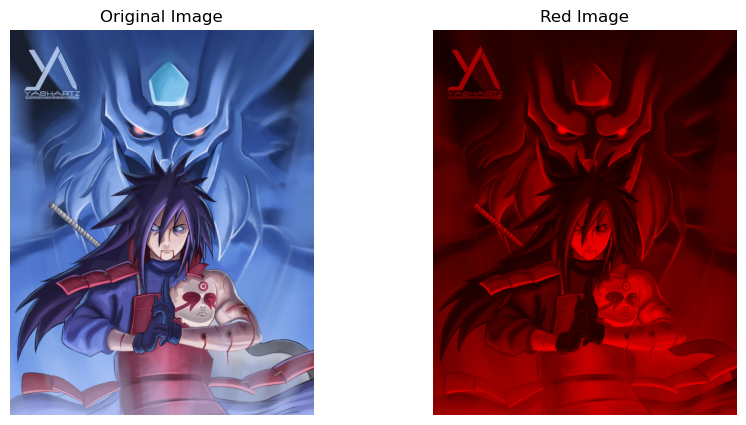

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('M_U.jpg')

# Apply Bilateral Filter
bilateral_filtered_image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

# Change color to red by zeroing the green and blue channels
red_image = np.zeros_like(bilateral_filtered_image)
red_image[:, :, 2] = bilateral_filtered_image[:, :, 2]  # Copy the red channel

# Display the original and red images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(red_image, cv2.COLOR_BGR2RGB))
plt.title('Red Image')
plt.axis('off')
plt.show()

# 9. Brightness Adjustment: Adjust the brightness of the image.

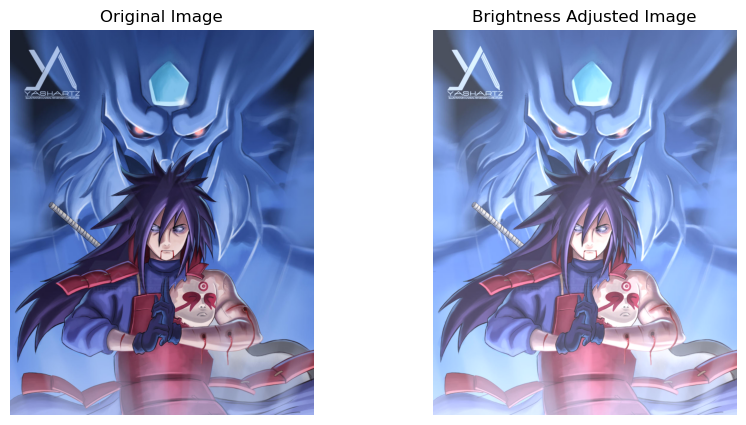

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('M_U.jpg')

# Adjust brightness by adding a constant value
brightness_adjusted_image = cv2.convertScaleAbs(image, alpha=1, beta=50)  # beta is the brightness value

# Display the original and brightness adjusted images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(brightness_adjusted_image, cv2.COLOR_BGR2RGB))
plt.title('Brightness Adjusted Image')
plt.axis('off')
plt.show()

# 10. Canny Edge Detection: Apply the Canny edge detection algorithm.

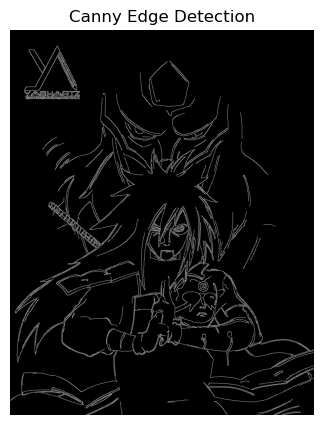

In [25]:
import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale mode
image = cv2.imread('M_U.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Canny edge detection
canny_edges = cv2.Canny(image, 100, 200)

# Display the results
plt.figure(figsize=(10, 5))
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()

# 11. Emboss Filter: Apply an emboss filter to create a 3D effect.

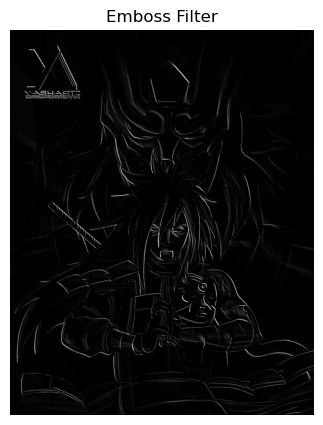

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('M_U.jpg', cv2.IMREAD_GRAYSCALE)

# Define emboss kernel
kernel = np.array([[0, -1, -1],
                   [1, 0, -1],
                   [1, 1, 0]])

# Apply emboss filter
embossed_image = cv2.filter2D(image, -1, kernel)

# Display the results
plt.figure(figsize=(10, 5))
plt.imshow(embossed_image, cmap='gray')
plt.title('Emboss Filter')
plt.axis('off')
plt.show()

# 12. Median Blur: Apply median blur to reduce noise while preserving edges.

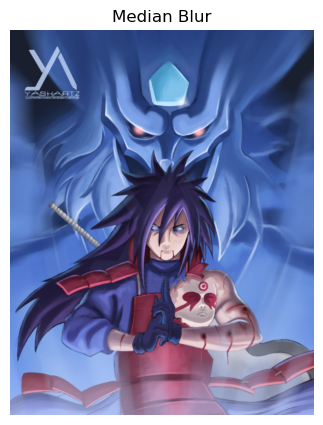

In [29]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('M_U.jpg')

# Apply median blur
median_blurred_image = cv2.medianBlur(image, 5)  # ksize must be odd and greater than 1

# Display the results
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(median_blurred_image, cv2.COLOR_BGR2RGB))
plt.title('Median Blur')
plt.axis('off')
plt.show()

# 13. Motion Blur: Simulate motion blur in the image.

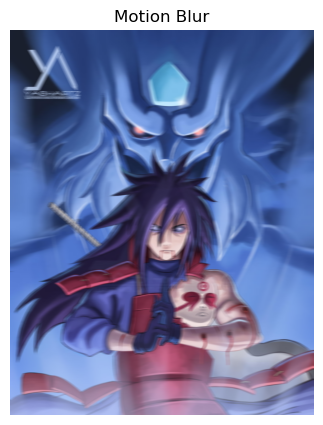

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('M_U.jpg')

# Define motion blur kernel
kernel_size = 15
kernel_motion_blur = np.zeros((kernel_size, kernel_size))
kernel_motion_blur[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
kernel_motion_blur = kernel_motion_blur / kernel_size

# Apply motion blur
motion_blurred_image = cv2.filter2D(image, -1, kernel_motion_blur)

# Display the results
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(motion_blurred_image, cv2.COLOR_BGR2RGB))
plt.title('Motion Blur')
plt.axis('off')
plt.show()

# 14. Sharpen Filter: Apply a sharpen filter to enhance edges.

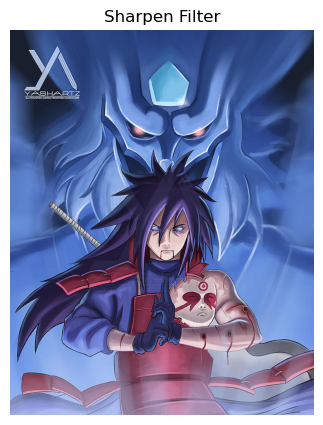

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('M_U.jpg')

# Define sharpen kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# Apply sharpen filter
sharpened_image = cv2.filter2D(image, -1, kernel)

# Display the results
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title('Sharpen Filter')
plt.axis('off')
plt.show()

# 15. Add Gaussian Noise: Add Gaussian noise to the image.

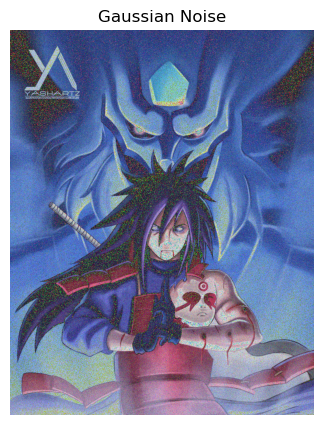

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('M_U.jpg')

# Generate Gaussian noise
row, col, ch = image.shape
mean = 0
sigma = 0.1
gauss = np.random.normal(mean, sigma, (row, col, ch))
gauss = gauss.reshape(row, col, ch)
noisy_image = image + gauss * 255

# Display the results
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(np.uint8(noisy_image), cv2.COLOR_BGR2RGB))
plt.title('Gaussian Noise')
plt.axis('off')
plt.show()

# 16. Grayscale Conversion: Convert the image to grayscale.

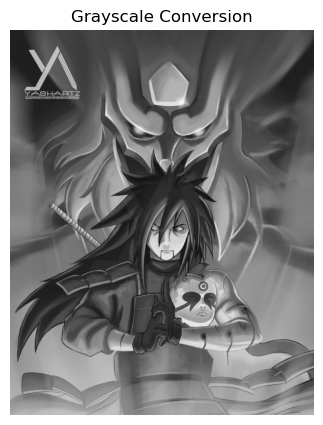

In [37]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('M_U.jpg')

# Convert to grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the results
plt.figure(figsize=(10, 5))
plt.imshow(grayscale_image, cmap='gray')
plt.title('Grayscale Conversion')
plt.axis('off')
plt.show()

# 17. Box Filter (Averaging Filter): Apply a box filter to smooth the image.

Time taken to apply box filter: 0.003999948501586914 seconds


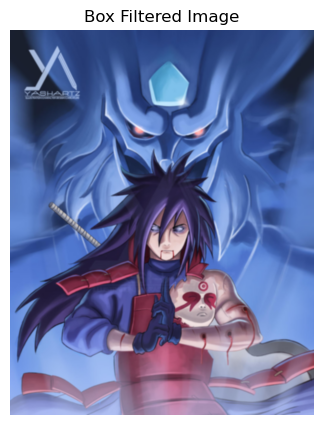

In [60]:
import cv2
import time
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('M_U.jpg')

if image is None:
    raise ValueError("Image not found. Please check the path.")

# Measure the time to apply Box Filter
start_time = time.time()
box_filtered_image = cv2.blur(image, (5, 5))
end_time = time.time()

print(f"Time taken to apply box filter: {end_time - start_time} seconds")

# Convert the image from BGR to RGB format for displaying using matplotlib
box_filtered_image_rgb = cv2.cvtColor(box_filtered_image, cv2.COLOR_BGR2RGB)

# Display the result using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(box_filtered_image_rgb)
plt.title('Box Filtered Image')
plt.axis('off')  # Hide the axis
plt.show()

# 18. Unsharp Masking: Apply unsharp masking to enhance image contrast.

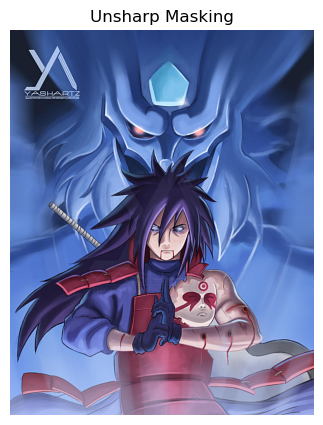

In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('M_U.jpg')

if image is None:
    raise ValueError("Image not found. Please check the path.")

# Apply Gaussian Blur
blurred = cv2.GaussianBlur(image, (9, 9), 10.0)

# Perform Unsharp Masking
unsharp_image = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)

# Convert the image from BGR to RGB format for displaying using matplotlib
unsharp_image_rgb = cv2.cvtColor(unsharp_image, cv2.COLOR_BGR2RGB)

# Display the result using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(unsharp_image_rgb)
plt.title('Unsharp Masking')
plt.axis('off')  # Hide the axis
plt.show()

# 19. Prewitt Filter: Apply the Prewitt filter for edge detection.

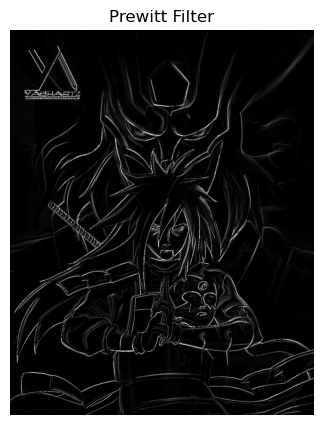

In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('M_U.jpg', cv2.IMREAD_GRAYSCALE)

if image is None:
    raise ValueError("Image not found. Please check the path.")

# Prewitt kernels
kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

# Apply Prewitt filter
prewitt_x = cv2.filter2D(image, -1, kernelx)
prewitt_y = cv2.filter2D(image, -1, kernely)
prewitt = prewitt_x + prewitt_y

# Display the result using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(prewitt, cmap='gray')
plt.title('Prewitt Filter')
plt.axis('off')  # Hide the axis
plt.show()

# 20. Cartoon Effect: Create a cartoon effect on the image.

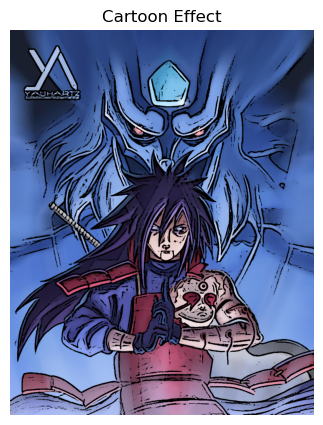

In [68]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('M_U.jpg')

if image is None:
    raise ValueError("Image not found. Please check the path.")

# Apply bilateral filter
color = cv2.bilateralFilter(image, 9, 75, 75)

# Convert to grayscale and apply median blur
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 7)

# Detect edges and create a mask
edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 2)

# Combine color image with edges
cartoon = cv2.bitwise_and(color, color, mask=edges)

# Convert the image from BGR to RGB format for displaying using matplotlib
cartoon_rgb = cv2.cvtColor(cartoon, cv2.COLOR_BGR2RGB)

# Display the result using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(cartoon_rgb)
plt.title('Cartoon Effect')
plt.axis('off')  # Hide the axis
plt.show()

# 21. Pencil Sketch Effect: Create a pencil sketch effect on the image.

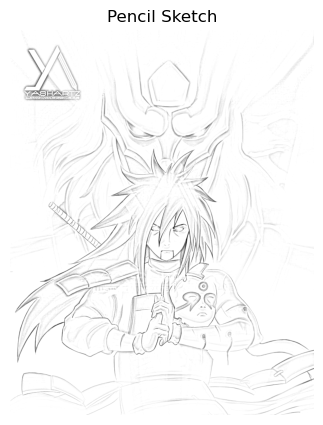

In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('M_U.jpg')

if image is None:
    raise ValueError("Image not found. Please check the path.")

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Invert the grayscale image
inverted_image = 255 - gray_image

# Apply Gaussian blur
blurred = cv2.GaussianBlur(inverted_image, (21, 21), 0)

# Create the pencil sketch effect
inverted_blurred = 255 - blurred
pencil_sketch = cv2.divide(gray_image, inverted_blurred, scale=256.0)

# Display the result using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(pencil_sketch, cmap='gray')
plt.title('Pencil Sketch')
plt.axis('off')  # Hide the axis
plt.show()

# 22. Histogram Equalization: Apply histogram equalization to improve the contrast of the image.

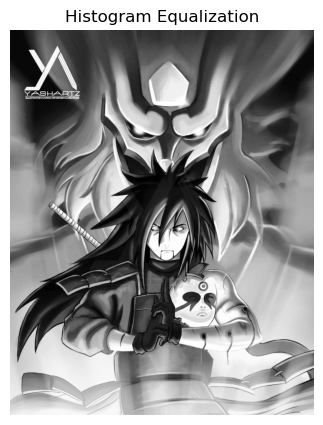

In [74]:
import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('M_U.jpg', cv2.IMREAD_GRAYSCALE)

if image is None:
    raise ValueError("Image not found. Please check the path.")

# Apply Histogram Equalization
equalized_image = cv2.equalizeHist(image)

# Display the result using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalization')
plt.axis('off')  # Hide the axis
plt.show()

# 23. CLAHE (Contrast Limited Adaptive Histogram Equalization).

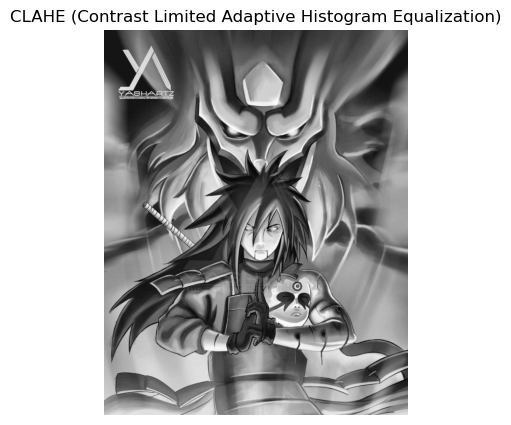

In [76]:
import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('M_U.jpg', cv2.IMREAD_GRAYSCALE)

if image is None:
    raise ValueError("Image not found. Please check the path.")

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(image)

# Display the result using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(clahe_image, cmap='gray')
plt.title('CLAHE (Contrast Limited Adaptive Histogram Equalization)')
plt.axis('off')  # Hide the axis
plt.show()

# 24. Adaptive Thresholding.

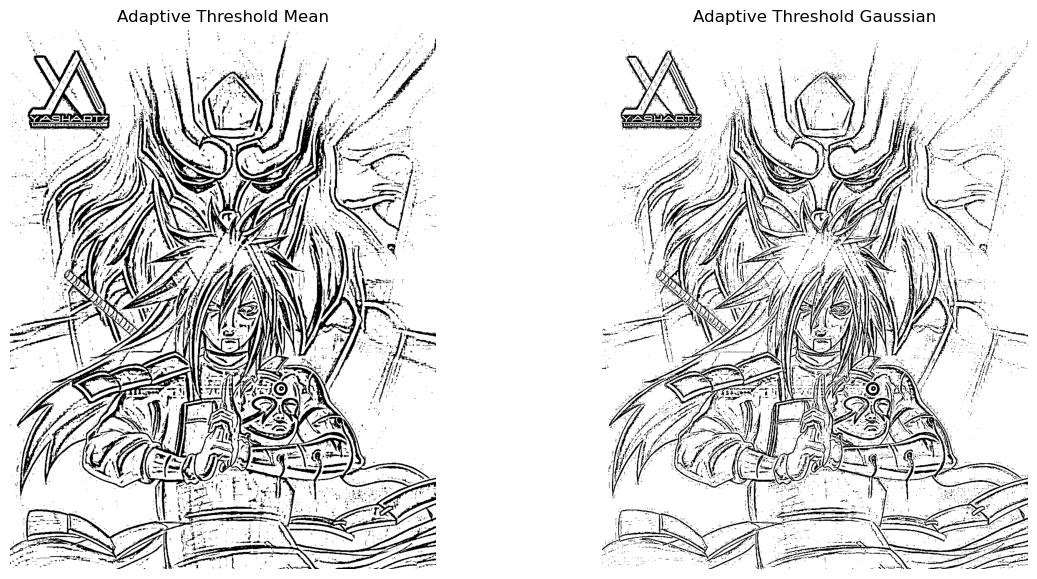

In [78]:
import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('M_U.jpg', cv2.IMREAD_GRAYSCALE)

if image is None:
    raise ValueError("Image not found. Please check the path.")

# Apply Adaptive Thresholding using MEAN and GAUSSIAN methods
adaptive_thresh_mean = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
adaptive_thresh_gaussian = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Display the results using matplotlib
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(adaptive_thresh_mean, cmap='gray')
plt.title('Adaptive Threshold Mean')
plt.axis('off')  # Hide the axis

plt.subplot(1, 2, 2)
plt.imshow(adaptive_thresh_gaussian, cmap='gray')
plt.title('Adaptive Threshold Gaussian')
plt.axis('off')  # Hide the axis

plt.show()

# 25. Frequency Domain Filtering (High-Pass and Low-Pass Filters).

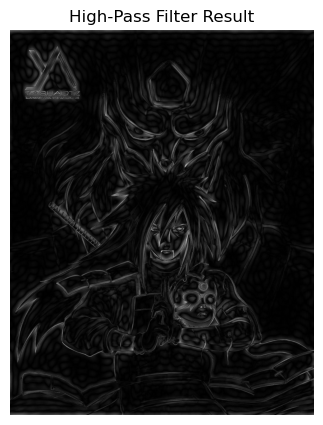

In [80]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('M_U.jpg', cv2.IMREAD_GRAYSCALE)

if image is None:
    raise ValueError("Image not found. Please check the path.")

# Perform the Discrete Fourier Transform (DFT)
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Get image dimensions
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2

# Create mask for High-Pass Filter
mask = np.ones((rows, cols, 2), np.uint8)
r = 30  # Radius of the mask
center = (crow, ccol)
x, y = np.ogrid[:rows, :cols]
mask_area = (x - crow) ** 2 + (y - ccol) ** 2 <= r * r
mask[mask_area] = 0

# Apply the mask and inverse DFT
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
image_back = cv2.idft(f_ishift)
image_back = cv2.magnitude(image_back[:, :, 0], image_back[:, :, 1])

# Display the result using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(image_back, cmap='gray')
plt.title('High-Pass Filter Result')
plt.axis('off')  # Hide the axis
plt.show()

# 26. Bilateral Grid Filtering.

In [90]:
import cv2
import matplotlib.pyplot as plt

# Install opencv-contrib-python if not already installed
!pip install opencv-contrib-python

# Load the image
image = cv2.imread('M_U.jpg')

if image is None:
    raise ValueError("Image not found. Please check the path.")

# Apply Bilateral Filter using ximgproc module
bilateral_grid = cv2.ximgproc.bilateralFilter(image, d=-1, sigmaColor=75, sigmaSpace=75)

# Convert the image from BGR to RGB format for displaying using matplotlib
bilateral_grid_rgb = cv2.cvtColor(bilateral_grid, cv2.COLOR_BGR2RGB)

# Display the result using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(bilateral_grid_rgb)
plt.title('Bilateral Grid Filter')
plt.axis('off')  # Hide the axis
plt.show()

   ---------------------------------------- 0.0/45.5 MB ? eta -:--:--
   - -------------------------------------- 1.3/45.5 MB 8.4 MB/s eta 0:00:06
   -- ------------------------------------- 3.1/45.5 MB 8.8 MB/s eta 0:00:05
   ---- ----------------------------------- 4.7/45.5 MB 8.9 MB/s eta 0:00:05
   ----- ---------------------------------- 6.8/45.5 MB 8.9 MB/s eta 0:00:05
   ------- -------------------------------- 8.4/45.5 MB 8.7 MB/s eta 0:00:05
   -------- ------------------------------- 10.2/45.5 MB 8.9 MB/s eta 0:00:04
   ---------- ----------------------------- 12.3/45.5 MB 8.9 MB/s eta 0:00:04
   ------------ --------------------------- 14.2/45.5 MB 9.1 MB/s eta 0:00:04
   -------------- ------------------------- 16.3/45.5 MB 9.1 MB/s eta 0:00:04
   ---------------- ----------------------- 18.6/45.5 MB 9.3 MB/s eta 0:00:03
   ------------------ --------------------- 21.0/45.5 MB 9.5 MB/s eta 0:00:03
   -------------------- ------------------- 23.3/45.5 MB 9.6 MB/s eta 0:00:03

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Virtu\\anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



AttributeError: module 'cv2' has no attribute 'ximgproc'

# 27. Edge-Preserving Filter (e.g., cv2.edgePreservingFilter).

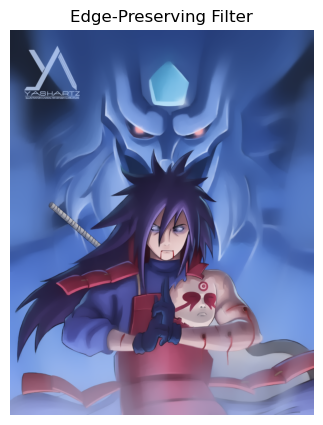

In [86]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('M_U.jpg')

if image is None:
    raise ValueError("Image not found. Please check the path.")

# Apply Edge-Preserving Filter
edge_preserving = cv2.edgePreservingFilter(image, flags=1, sigma_s=60, sigma_r=0.4)

# Convert the image from BGR to RGB format for displaying using matplotlib
edge_preserving_rgb = cv2.cvtColor(edge_preserving, cv2.COLOR_BGR2RGB)

# Display the result using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(edge_preserving_rgb)
plt.title('Edge-Preserving Filter')
plt.axis('off')  # Hide the axis
plt.show()

# 28. Scharr Filter.

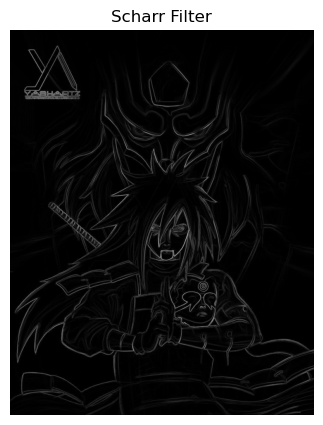

In [88]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('M_U.jpg', cv2.IMREAD_GRAYSCALE)

if image is None:
    raise ValueError("Image not found. Please check the path.")

# Apply Scharr filter in x and y directions
scharr_x = cv2.Scharr(image, cv2.CV_64F, 1, 0)
scharr_y = cv2.Scharr(image, cv2.CV_64F, 0, 1)

# Compute the magnitude of the gradient
scharr = cv2.magnitude(scharr_x, scharr_y)

# Normalize the result to the range 0 to 255 for display
scharr = cv2.normalize(scharr, None, 0, 255, cv2.NORM_MINMAX)
scharr = np.uint8(scharr)

# Display the result using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(scharr, cmap='gray')
plt.title('Scharr Filter')
plt.axis('off')  # Hide the axis
plt.show()